In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
restaurants = pd.read_csv(r'C:\Users\star\Documents\Python Start Projects\Machine-Learning-Internship-Cognifyz\Data\Dataset.csv')
restaurants.shape

(9551, 21)

In [4]:
restaurants.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [5]:
restaurants.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Removing Restraurant Id column
restaurants = restaurants.drop(columns=['Restaurant ID'])
restaurants.head(3)

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
# Label Encoding Multiple Columns
label_encoder = LabelEncoder()
columns_encode = ['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency','Rating color','Rating text']

for column in columns_encode:
    restaurants[column] = label_encoder.fit_transform(restaurants[column])

restaurants.head(5)

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,8685,171,172,121.027535,14.565443,920,1100,0,Yes,No,No,No,3,4.8,0,1,314
1,3172,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,Yes,No,No,No,3,4.5,0,1,591
2,2896,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,Yes,No,No,No,4,4.4,1,5,270
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,No,No,No,No,4,4.9,0,1,365
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,Yes,No,No,No,4,4.8,0,1,229


In [8]:
columns=['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
for column in columns:
    restaurants[column] = label_encoder.fit_transform(restaurants[column])
restaurants.head(5)

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,3172,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,2896,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229


In [9]:
restaurants.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#Splitting data into Features and Labels
X = restaurants.drop(columns=['Aggregate rating'])
y = restaurants['Aggregate rating']
X.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,3748,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,0,3,0,1,314
1,3172,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,0,3,0,1,591
2,2896,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,0,4,1,5,270
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,0,4,0,1,365
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,0,4,0,1,229


In [11]:
y.head()

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [12]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
5375,2716,1,88,512,659,670,77.181405,28.522813,1655,350,4,0,0,0,0,1,2,0,7
7316,5405,1,88,6616,1007,1060,77.224753,28.575990,177,200,4,0,0,0,0,1,4,3,1
9544,3398,208,140,5925,517,523,28.977636,41.022904,767,40,11,0,0,0,0,2,0,1,1305
5517,4139,1,88,4678,683,694,77.139708,28.659466,1306,600,4,0,0,0,0,2,2,0,6
3281,1341,1,88,2930,278,284,77.205889,28.698635,1568,300,4,0,0,0,0,1,2,0,45


In [13]:
y_train.head()

5375    3.0
7316    0.0
9544    4.7
5517    3.0
3281    2.6
Name: Aggregate rating, dtype: float64

In [14]:
X_train.shape

(9455, 19)

In [15]:
# Random Forest Regressor Model Training 

pred_model = RandomForestRegressor(n_estimators=100, random_state=42)
pred_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Saving model
import joblib
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(pred_model, file)

In [17]:
# Predict on the test set
y_pred = pred_model.predict(X_test)


In [18]:
# Calculate Performance
mse_perf = mean_squared_error(y_test, y_pred)
r2_perf = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse_perf)
print("R-squared :", r2_perf)

Mean Squared Error : 0.023098593750000007
R-squared : 0.990603227741574


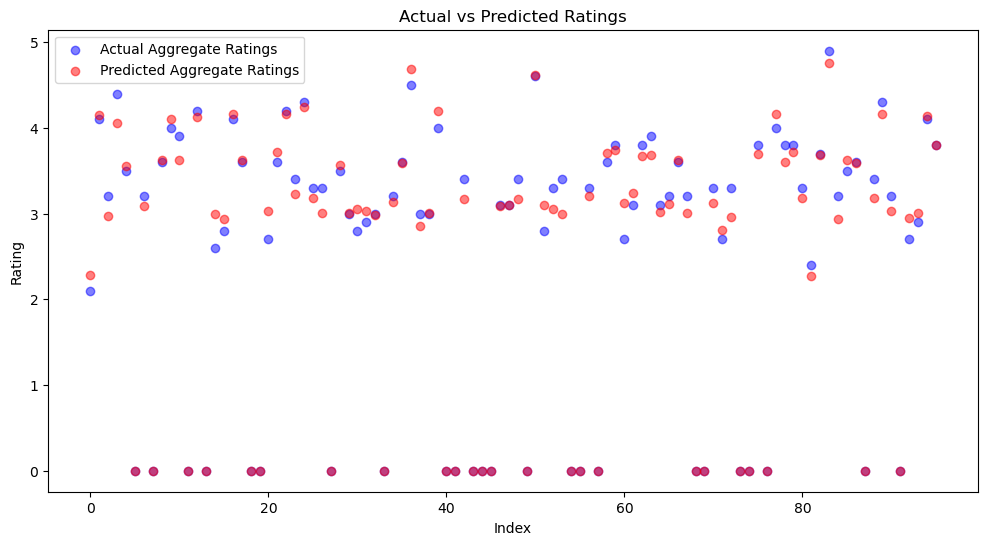

In [19]:
# Plotting predicted ratings from testing data
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual Aggregate Ratings', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Aggregate Ratings', alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.legend()
plt.show()

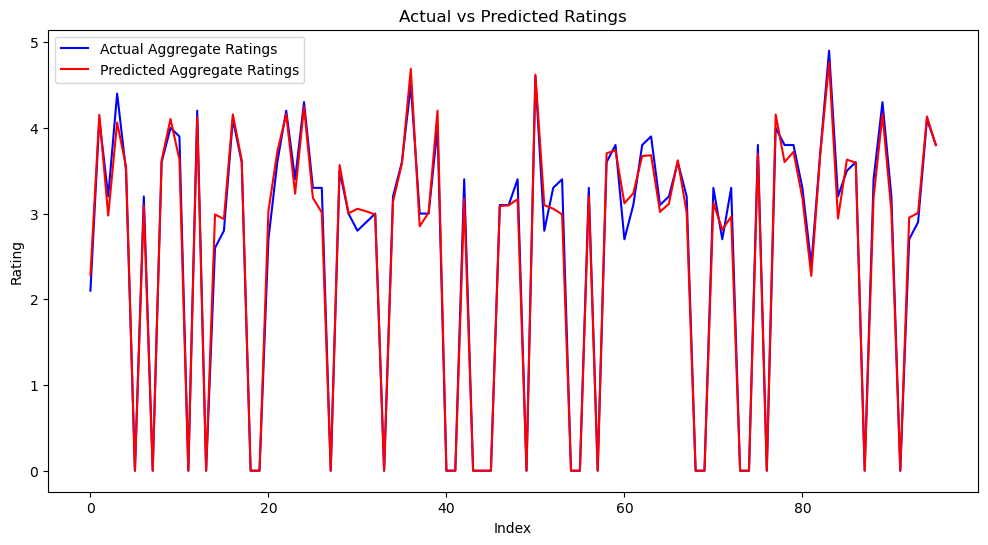

In [20]:
# Plotting predicted ratings

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Aggregate Ratings')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Aggregate Ratings')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [21]:
# Get feature importances
importances = pred_model.feature_importances_
feature_names = X_train.columns 

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                 Feature  Importance
18                 Votes    0.899685
16          Rating color    0.081893
17           Rating text    0.006956
7               Latitude    0.001789
6              Longitude    0.001734
3                Address    0.001671
0        Restaurant Name    0.001653
8               Cuisines    0.001547
9   Average Cost for two    0.000972
4               Locality    0.000669
5       Locality Verbose    0.000660
12   Has Online delivery    0.000248
2                   City    0.000214
15           Price range    0.000152
11     Has Table booking    0.000072
10              Currency    0.000032
13     Is delivering now    0.000027
1           Country Code    0.000026
14  Switch to order menu    0.000000


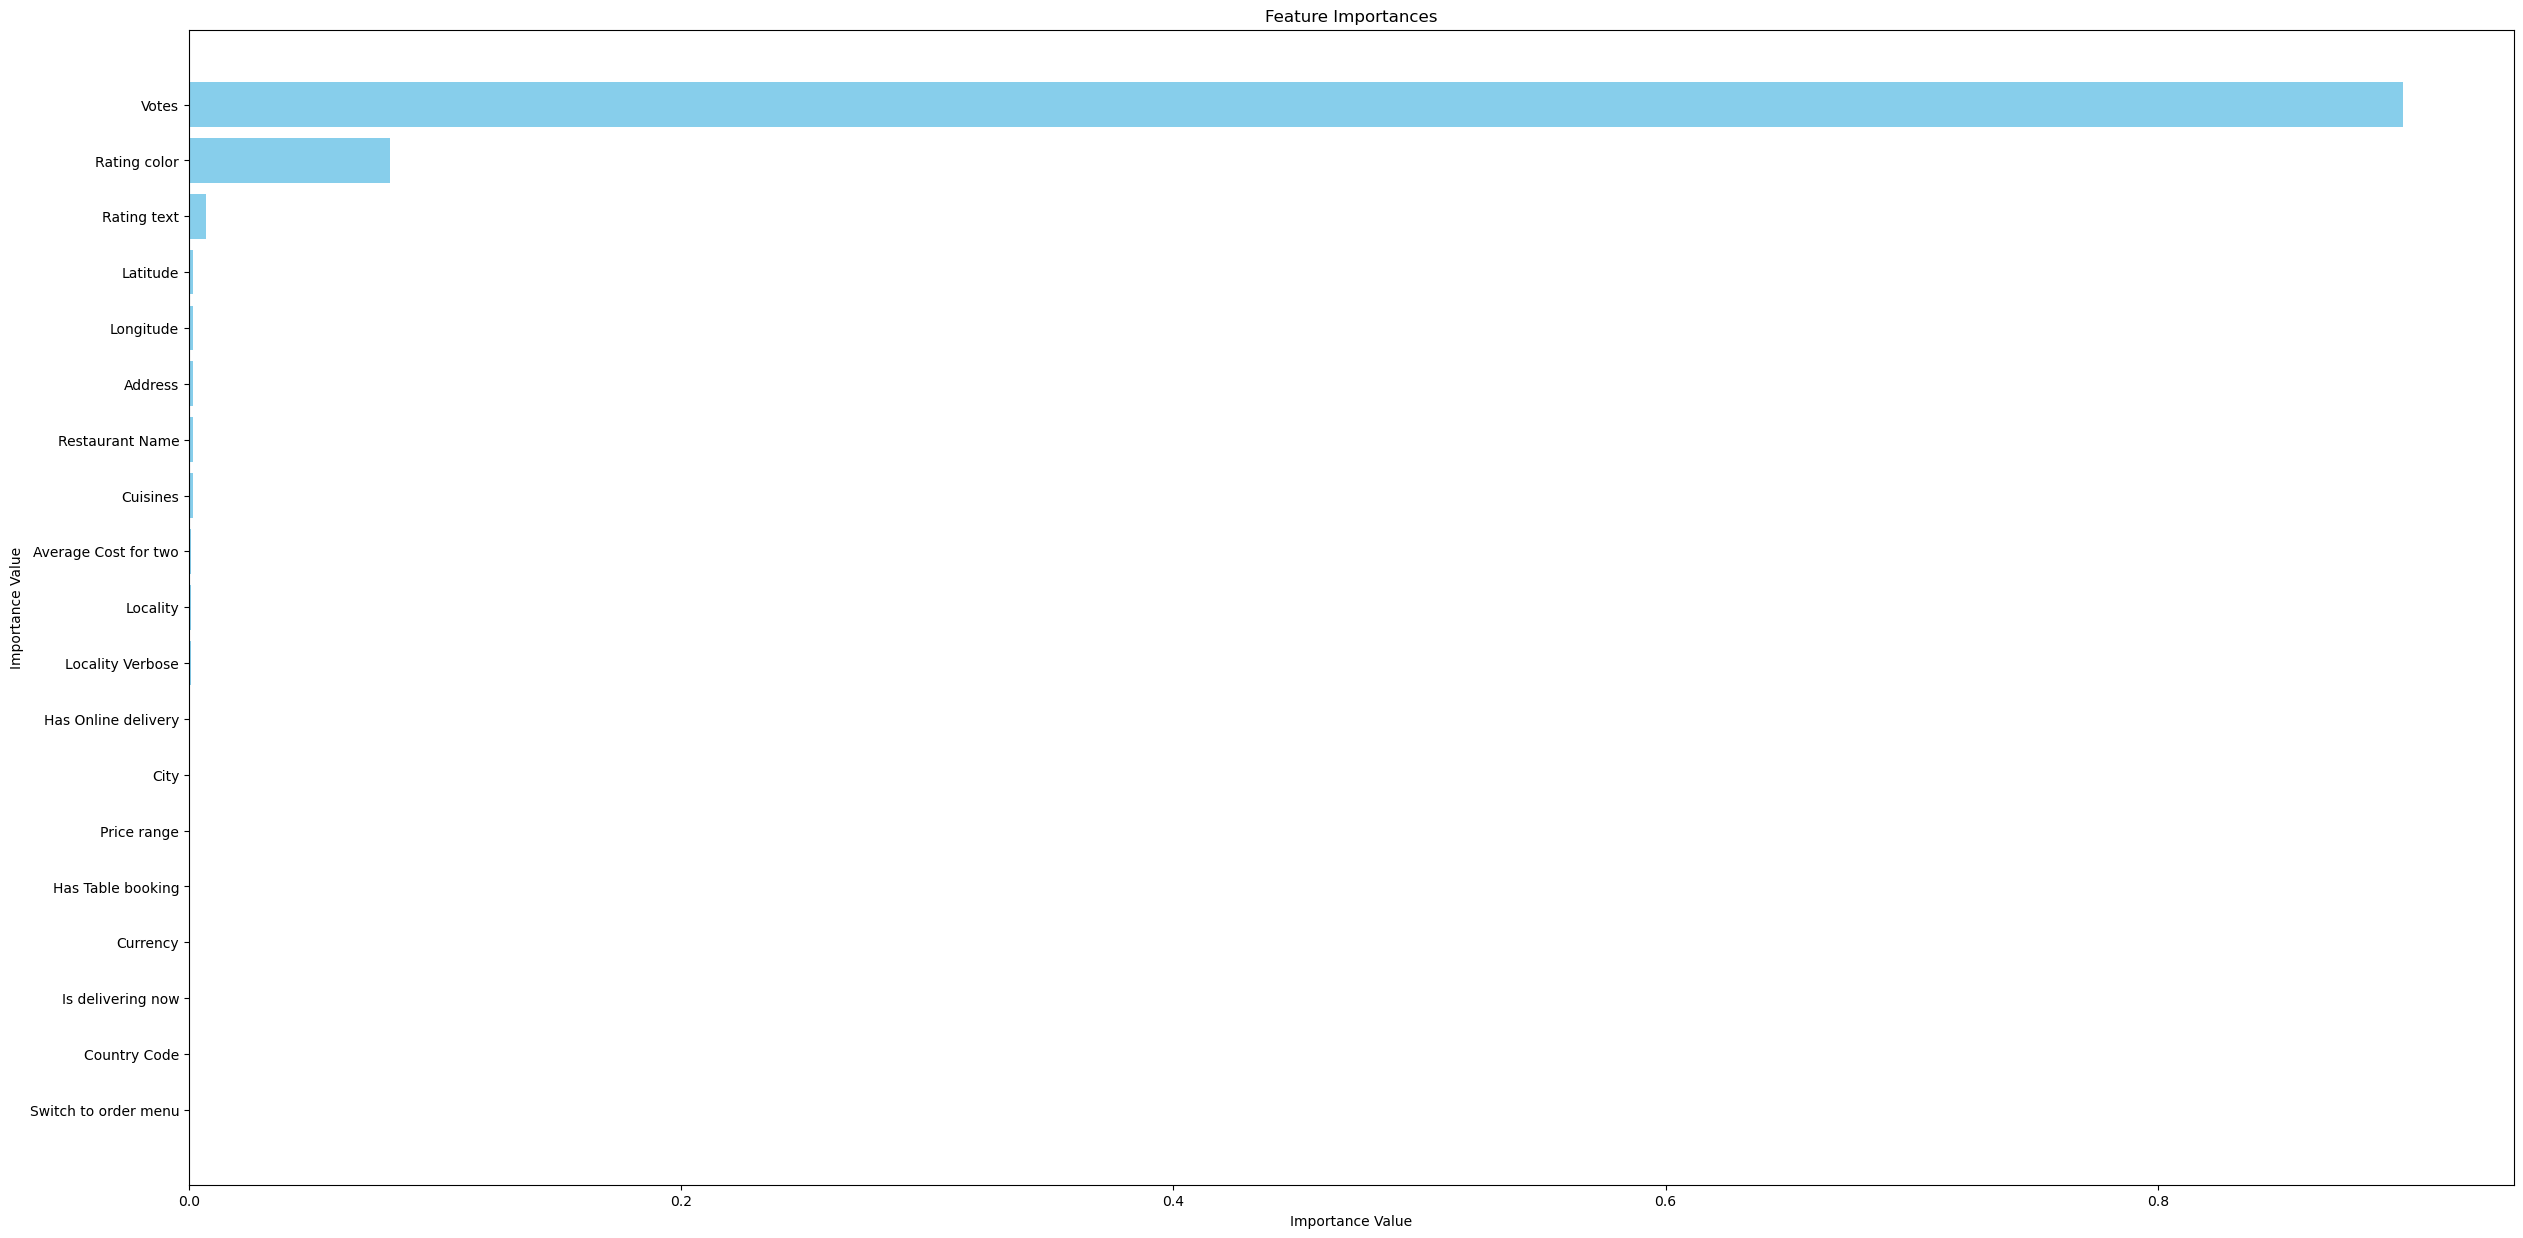

In [22]:
#Displaying Most important Feature

plt.figure(figsize=(30, 15))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance Value')
plt.ylabel('Importance Value')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()


In [23]:
# So, the conclusion is that firstly Votes then Rating Color and then Rating Text are more important in features.